<a href="https://colab.research.google.com/github/Nishant453563/Fundamental/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Written Digits Identification Project

## Objective
To develop a model which can identify the hand written digits.

## Data Source
The dataset is available on different platforms and also a part of dataset module of scikit package.Originally,it is sourced from:
E. Alpaydin, C. Kaynak
Department of Computer Engineering
Bogazici University, 80815 Istanbul Turkey
alpaydin '@' boun.edu.tr

## Importing the libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data

In [6]:
from sklearn.datasets import load_digits
dataset1 = load_digits()

## Describe Data 

32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. Digits dataset contain 1797 such matrices.

In [7]:
dataset1.images.shape

(1797, 8, 8)

In [8]:
dataset1.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
dataset1.images[0].shape

(8, 8)

In [10]:
len(dataset1.images)

1797

## Data Visualization

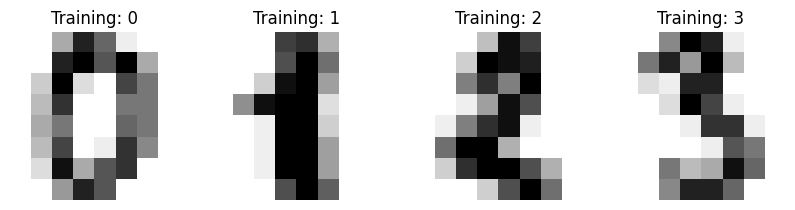

In [11]:
_,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax , image , label in zip(axes , dataset1.images, dataset1.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
  ax.set_title('Training: %i'%label)

## Data Preprocessing

In [12]:
data = dataset1.images.reshape((len(dataset1.images),-1))

In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
data[0].shape

(64,)

In [15]:
data.shape

(1797, 64)

In [16]:
print('Data min. : '+str(data.min()))
print('Data max. : '+str(data.max()))

Data min. : 0.0
Data max. : 16.0


In [17]:
data /= 16

In [18]:
print('Data min. : '+str(data.min()))
print('Data max. : '+str(data.max()))

Data min. : 0.0
Data max. : 1.0


In [19]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Define Target Variable (y) and Feature Variables (X)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,dataset1.target,test_size=0.3)

## Train Test Split

In [21]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## Preparing Random Forest Classification Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [23]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

## Prediction

In [24]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 8, 0, 1, 7, 3, 0, 8, 2, 6, 5, 3, 5, 0, 7, 6, 9, 0, 6, 6, 1, 0,
       0, 9, 0, 7, 1, 1, 1, 8, 8, 2, 1, 9, 2, 5, 2, 8, 0, 9, 0, 6, 2, 5,
       2, 8, 5, 2, 3, 4, 8, 1, 8, 8, 6, 8, 6, 1, 6, 6, 8, 3, 5, 2, 3, 9,
       2, 5, 7, 0, 5, 2, 7, 3, 5, 5, 8, 7, 1, 0, 8, 4, 3, 8, 4, 7, 4, 4,
       6, 4, 5, 4, 8, 1, 7, 9, 8, 2, 2, 1, 1, 9, 3, 6, 2, 4, 5, 4, 4, 5,
       7, 2, 2, 1, 8, 1, 8, 1, 4, 8, 8, 1, 6, 6, 3, 7, 4, 4, 9, 8, 6, 3,
       5, 2, 3, 5, 8, 4, 7, 4, 0, 7, 7, 5, 8, 1, 0, 6, 1, 8, 3, 4, 4, 9,
       6, 8, 9, 8, 4, 4, 2, 1, 7, 0, 5, 4, 3, 5, 7, 2, 4, 3, 7, 7, 3, 0,
       1, 5, 2, 5, 9, 0, 3, 9, 7, 1, 6, 5, 2, 3, 2, 3, 9, 0, 2, 5, 3, 1,
       9, 4, 7, 3, 3, 8, 0, 4, 0, 3, 6, 5, 3, 7, 2, 5, 1, 4, 7, 1, 7, 1,
       8, 0, 7, 0, 6, 4, 8, 0, 6, 7, 5, 9, 1, 1, 1, 2, 1, 1, 3, 6, 2, 1,
       6, 4, 7, 5, 4, 9, 2, 8, 9, 4, 8, 3, 2, 1, 9, 1, 4, 6, 6, 2, 1, 5,
       5, 2, 5, 1, 7, 4, 2, 4, 2, 9, 9, 4, 9, 0, 8, 4, 8, 4, 6, 0, 0, 6,
       3, 6, 9, 0, 0, 7, 7, 2, 4, 4, 4, 4, 8, 1, 7,

## Model Evaluation

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[49  0  1  0  0  0  0  0  0  0]
 [ 0 58  0  0  0  0  0  0  2  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  1 50  0  0  0  0  0  0]
 [ 1  0  0  0 66  0  0  0  0  0]
 [ 0  0  0  0  0 55  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  1  0  0  0  0 52  1]
 [ 0  0  0  0  0  0  0  0  1 42]]


In [26]:
accuracy_score(y_pred,y_test)

0.9851851851851852

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.97      1.00      0.98        58
           2       1.00      0.96      0.98        54
           3       0.98      0.98      0.98        51
           4       0.99      1.00      0.99        66
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       0.96      0.95      0.95        55
           9       0.98      0.98      0.98        43

    accuracy                           0.99       540
   macro avg       0.99      0.98      0.98       540
weighted avg       0.99      0.99      0.99       540



## Explaination

1797 Matrices are flattened into a tuple.64 attributes of tuples serve as features for the model to be developed. A random forest classifier model is developed , trained. Model is evaluated using various metrics by comapring predictions with actual test results.